In [1]:
import sys
sys.path.append('..')
from QCreator.transmission_line_simulator import *

In [2]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [3]:
import matplotlib.pyplot as plt

# Setup the circuit for the capacitive coupling

In [17]:
line_qubit_capacitor = Capacitor()
line_ground_capacitor = Capacitor()
line_end = Resistor()

GND = Short()
line = TLCoupler(n=1)

qubit_cap = Capacitor()
qubit_inductor = Inductor()

circuit = TLSystem()

circuit.add_element(qubit_cap, [1,0])
circuit.add_element(qubit_inductor, [1,0])
circuit.add_element(line_qubit_capacitor, [1,2])
circuit.add_element(line_ground_capacitor, [2,0])
circuit.add_element(line, [2,3])
circuit.add_element(line_end, [3,0])
circuit.add_element(GND, [0])

In [27]:
line.l = 10e-3
line.Cl = 146.305e-12
line.Ll = 529.989e-9
line.Rl = 0
line.Gl = 0

line_end.R=50

qubit_cap.C= 80e-15
qubit_inductor.L=20e-9

line_qubit_capacitor.C=50e-15
line_ground_capacitor.C=1e-9

In [28]:
f, delta, modes=circuit.get_modes()

In [29]:
f/2/np.pi/1e9,2*delta/1e6

(array([ 3.12131524,  5.67871479, 11.40359321, 15.43683772, 16.14283832,
        17.01691099, 17.86804166, 18.41182037, 19.03314313]),
 array([ 2.67396251e-04,  2.70351346e+04,  2.77207443e+04,  9.15134065e+03,
         1.07748444e+05,  1.86736305e+04,  1.76941034e+05, -1.18528397e+05,
        -1.27763166e+05]))

In [30]:
f/2/np.pi/1e9,2*delta/1e6

(array([ 3.12131524,  5.67871479, 11.40359321, 15.43683772, 16.14283832,
        17.01691099, 17.86804166, 18.41182037, 19.03314313]),
 array([ 2.67396251e-04,  2.70351346e+04,  2.77207443e+04,  9.15134065e+03,
         1.07748444e+05,  1.86736305e+04,  1.76941034e+05, -1.18528397e+05,
        -1.27763166e+05]))

# Setup the circuit for the capacitive coupling + inductive end

In [15]:
line_qubit_capacitor = Capacitor()
line_coupler_middle_inductor = Inductor()
line_ground_inductor = Inductor()
line_end = Resistor()

GND = Short()
line = TLCoupler(n=1)

qubit_cap = Capacitor()
qubit_inductor = Inductor()

circuit = TLSystem()

circuit.add_element(qubit_cap, [1,0])
circuit.add_element(qubit_inductor, [1,0])
circuit.add_element(line_qubit_capacitor, [1,2])
circuit.add_element(line_ground_inductor, [2,0])
circuit.add_element(line_coupler_middle_inductor, [2,3])
circuit.add_element(line, [3,4])
circuit.add_element(line_end, [4,0])
circuit.add_element(GND, [0])

In [48]:
line.l = 10e-3
line.Cl = 146.305e-12
line.Ll = 529.989e-9
line.Rl = 0
line.Gl = 0

line_end.R=50

qubit_cap.C= 80e-15
qubit_inductor.L=20e-9

line_qubit_capacitor.C=1e-15
line_coupler_middle_inductor.L=40e-9*0
line_ground_inductor.L=1e-9

In [49]:
f, delta, modes=circuit.get_modes()

In [50]:
f/2/np.pi/1e9,2*delta/1e6

(array([ 3.95422252,  4.81358367,  9.88872228, 14.84176287, 16.46915238,
        16.81703247, 16.90254592, 18.54694097, 18.89968708, 28.33166236]),
 array([ 7.13665251e-02,  2.34866463e+04,  2.50300085e+04,  1.29153266e+04,
         1.04568236e+04,  1.44024288e+05,  8.26575541e+04, -1.26629338e+05,
        -1.17529556e+05,  3.20658961e+05]))

In [43]:
f/2/np.pi/1e9,2*delta/1e6

(array([  3.95422445,  32.16531914,  86.44291807, 143.83354894,
        161.98400148, 163.32684199, 168.70277872, 184.03114446,
        191.13097916, 252.51543579]),
 array([ 7.01220083e-02,  2.40217853e+05,  2.63764063e+05,  1.80929597e+05,
         9.04799388e+04,  1.37172316e+06,  6.53167936e+05, -1.25689385e+06,
        -1.18231240e+06,  2.77976398e+06]))

# Setup the circuit for the qubit+resonator+feedline

In [ ]:
source = Port()
analyzer = Port()
GND = Short()
circuit_res_qubit = TLSystem()

resonator_short_end = TLCoupler(n=1)
resonator_claw_end = TLCoupler(n=1)
coupler = TLCoupler()

claw_res_ground = Capacitor()
claw_res_qubit = Capacitor()

qubit_L=Inductor()
qubit_C=Capacitor()


circuit_res_qubit.add_element(source, [1])
circuit_res_qubit.add_element(coupler, [1, 2, 3, 4])
circuit_res_qubit.add_element(analyzer, [3])
circuit_res_qubit.add_element(resonator_short_end, [4, 0])
circuit_res_qubit.add_element(resonator_claw_end, [2, 5])
circuit_res_qubit.add_element(claw_res_qubit, [5, 6])
circuit_res_qubit.add_element(claw_res_ground, [5, 0])

circuit_res_qubit.add_element(qubit_C, [6, 0])
circuit_res_qubit.add_element(qubit_L, [6, 0])

circuit_res_qubit.add_element(GND, [0])


In [ ]:
source.Z0=50
analyzer.Z0=50

coupler.l=0.4e-3
# resonator_feedline distances 12 21 12 8 10 15 10 Zr=52.5
coupler.Ll=np.asarray([[423.058e-9,41.177e-9],
                      [41.177e-9,442.626e-9]])
coupler.Cl=np.asarray([[165.215e-12,-15.37e-12],
                      [-15.37e-12,157.911e-12]])
coupler.Rl=np.zeros(coupler.Ll.shape, dtype=np.int)
coupler.Gl=np.zeros(coupler.Ll.shape, dtype=np.int)


resonator_short_end.l = 3.6e-3
resonator_short_end.Cl = 158.581e-12
resonator_short_end.Ll = 436.764e-9
resonator_short_end.Rl = 0
resonator_short_end.Gl = 0

resonator_claw_end.l = 1.0e-3
resonator_claw_end.Cl = 158.581e-12
resonator_claw_end.Ll = 436.764e-9
resonator_claw_end.Rl = 0
resonator_claw_end.Gl = 0

claw_res_ground.C=40e-15
claw_res_qubit.C=2e-15

qubit_C.C=80e-15
qubit_L.L=30e-9

In [ ]:
1/2/np.pi/np.sqrt(qubit_C.C*qubit_L.L)/1e9

# Get resonance modes and Qs

In [75]:
from QCreator.auxiliary_functions import search_for_resonators_qubits

In [76]:
f, delta, modes=circuit_res_qubit.get_modes()

In [77]:
f/2/np.pi/1e9, 2*delta/1e6

(array([  3.20877628,   5.70720533,  17.11858317,  28.60951987,
         39.80416816,  46.42515622,  53.58784598,  54.89827881,
         54.90090105,  55.21508579,  55.2165133 ,  78.97234622,
        114.13643741, 147.65748627, 148.70975048, 169.27877937,
        185.34855862, 196.90649537, 197.85816671, 197.92166022,
        198.54920027, 198.58521888, 284.7502958 , 291.20133513,
        302.52112918, 387.01577781, 418.85706017, 419.66181456,
        439.94809384, 481.43489987, 481.61976574, 495.43301257,
        495.96834101, 515.04995101, 515.32738587, 726.56639206]),
 array([ 5.33621908e-05,  2.92124788e+00,  2.61058843e+01,  6.72089627e+01,
         9.50778967e+01,  5.99415129e+01,  1.93286538e+02,  3.56838375e+05,
        -3.56945219e+05, -3.63360858e+05,  3.63469977e+05,  6.15398169e+02,
         3.07469967e+02,  3.03008257e+06,  4.98725990e-01,  4.72400225e+01,
         4.18441716e+06,  6.30289625e+02,  1.28265236e+06, -1.28681885e+06,
        -1.30626002e+06,  1.31060952e+06, 

In [78]:
num_modes=18
(res_fr,kappa,_)=search_for_resonators_qubits(f,delta,0,15)[:num_modes]

Resonance frequencies are, GHz: [3.20877628 5.70720533]
Kappas are, us^-1: [5.33621908e-05 2.92124788e+00]
Quality factors are: [3.77820619e+08 1.22753803e+04]


In [123]:
Zr=52.5
g_coupling_without_freqs=0.5*claw_res_qubit.C/np.sqrt(qubit_C.C)*np.sqrt(Zr)
def freqs_T1(Ls,circuit_model,g_coupling_without_freqs):
    # works for qubit freqs below the 2nd fundamental resonator mode
    qubit_freqs=[]
    kappas=[]
    single_mode_purcell=[]
    counter=0
    for L in Ls:
        qubit_L.L=L
        f, delta, modes=circuit_model.get_modes()
        if np.abs(f[0]/2/np.pi/1e9-f[1]/2/np.pi/1e9)>0.09:
            if counter==0:
                qubit_freqs.append(f[0]/2/np.pi/1e9)
                kappas.append(1/(2*delta[0]/1e6))
                g=g_coupling_without_freqs*np.sqrt(f[0])*f[1]/2/np.pi/1e9
                kappa_res=1/(2*delta[1]/1e6)
            else:
                qubit_freqs.append(f[1]/2/np.pi/1e9)
                kappas.append(1/(2*delta[1]/1e6))
                g=g_coupling_without_freqs*np.sqrt(f[1])*f[0]/2/np.pi/1e9
                kappa_res=2*delta[0]/1e6
            single_mode_purcell.append(kappa_res/(g/(f[0]/2/np.pi/1e9-f[1]/2/np.pi/1e9))**2)
        else:
            counter=1
    return qubit_freqs,kappas,single_mode_purcell

In [124]:
Ls=np.linspace(30e-9,5e-9,200)

In [125]:
qubit_freqs,T1,single_mode_purcell=freqs_T1(Ls,circuit_res_qubit,g_coupling_without_freqs)

In [96]:
import matplotlib.pyplot as plt

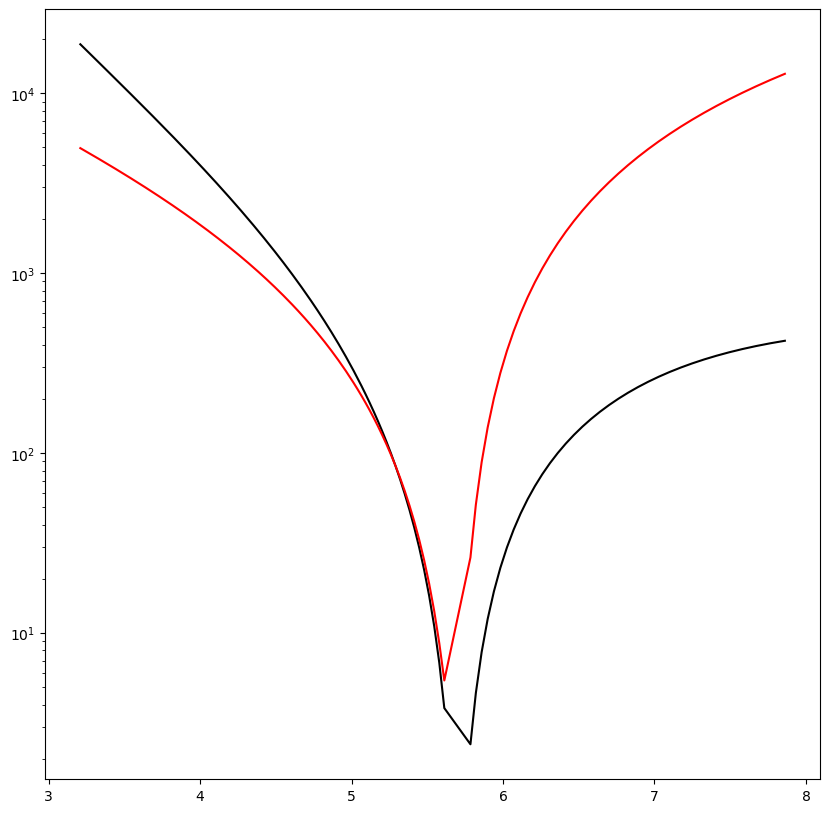

In [126]:
plt.semilogy(qubit_freqs,T1,'k')
plt.semilogy(qubit_freqs,single_mode_purcell,'r')
plt.show()

## Simulate scattering parameter S21

In [5]:
nop = 5000
frequency = np.linspace(4e9+0j, 6.5e9+0j, nop)
y = np.zeros(nop, dtype=complex)

In [14]:
matrix_of_curcuit=circuit.create_boundary_problem_matrix(frequency[0]*2*np.pi)

In [15]:
perturbation = np.zeros((matrix_of_curcuit.shape[0],1))
perturbation[0]=1
for i in range(nop):
    matrix_of_curcuit=circuit.create_boundary_problem_matrix(frequency[i]*2*np.pi)
    s21= np.linalg.solve(matrix_of_curcuit, perturbation)
    y[i]=s21[2]
S21 = y/np.max(y)

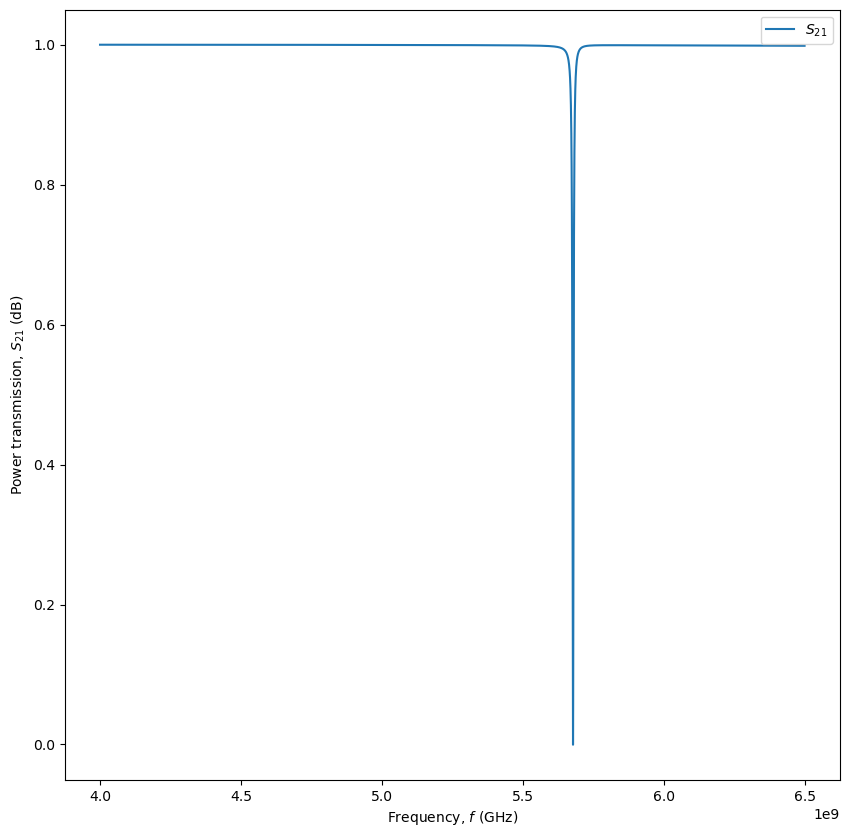

In [16]:
plt.plot(frequency.real, np.real(S21), label = '$S_{21}$')
plt.xlabel('Frequency, $f$ (GHz)')
plt.ylabel('Power transmission, $S_{21}$ (dB)')
plt.legend()
plt.show()

# PLayground

In [ ]:
import SchemDraw 
from matplotlib import pyplot as plt
from SchemDraw import elements as el
d = SchemDraw.Drawing()
d.add(el.GND)
d.add(el.DOT)
d.add(el.INDUCTOR, d='left', l=d.unit, label='M=12 pH', lblloc='bot')
d.push()
d.add(el.DOT, d='down', label='1')
d.add(el.RES, label='$Z_0=50\\Omega$', d='down')
d.add(el.GND)
d.pop()
d.add(el.JJ, d='up', label='219 nA')
d.add(el.LINE, d='right', l=d.unit)
d.add(el.DOT, lblloc='rgt', label='2')
d.add(el.JJ, d='down', label='32 nA')
d.add(el.LINE, d='right', l=d.unit)
d.add(el.CAP, d='up', label='70 fF', l=d.unit*2)
d.add(el.LINE, d='left', l=d.unit)
d.add(el.DOT, label='3')
d.add(el.JJ, d='down', label='32 nA')
d.draw()